### Objective: What will be predicted score if a student study for 9.25 hours in a day?

## Assumptions:

1)Checking Linear Relationship between variables.

2)All Variables Should Follow Normal Distribution

3)Very less or no multicollinearity

4)Very less or no autocorrelation

5) Data should be homoscedastic

In [2]:
##Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data"
sml = pd.read_csv(url)
sml.head(2)

,Hours,Scores
0,2.5,21
1,5.1,47


In [4]:
sml.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores')

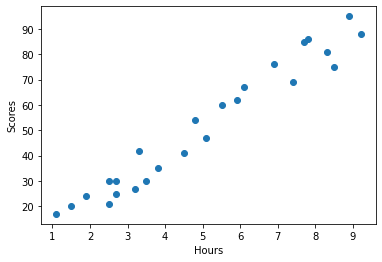

In [5]:
## Checking The Linear Relationship Between variables.
plt.scatter(sml.Hours,sml.Scores)
plt.xlabel('Hours')
plt.ylabel('Scores')

From the graph above, we can clearly see that there is a positive linear relationship between the number of hours studied and percentage of score

Above Graph satisfy the 1st assumption

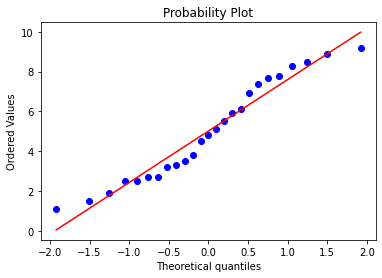

In [6]:
###To Check Normality Assumption
import scipy.stats as stats
stats.probplot(sml.iloc[:,0],dist='norm',plot=plt)
plt.show()

From the above Graph we can see that only few points are lie on red line and some points are outside of the line because of small sample size of 25

So we can't say exactly whether it follows normality or not.

Here in Our Data Only 1 variable is present as an independent Variable so there is no chance of multicollinearity,autocorrelation problem in the data

In [7]:
# normality test
col1=list(sml.columns.values)[0]
col2=list(sml.columns.values)[1]
print("Shapiro Wilk Test")
print("\n")
print("Null Hypothesis : Sample data of the variable is from Normal distribution")
print("Alternative Hypothesis : Sample data of the variable is not from from Normal distribution")
print("\n")

stat, p = stats.shapiro(sml[[col1]])
stat_2, p_2 = stats.shapiro(sml[[col2]])

print(col1 ," SW statistic : %.6f, p value : %.6f" % (stat, p))

print(col2 ," SW statistic : %.6f, p value : %.6f" % (stat_2, p_2))

# interpret
alpha = 0.05
if p > alpha:
    print(col1,"variable data" ,"is from Normal Distribution (fail to reject H0)")
else:
    print(col1,"variable data","is not from Normal Distribution (reject H0)")
    
    
if p_2 > alpha:
    print(col2,"variable data","is from Normal Distribution (fail to reject H0)")
else:
    print(col2,"variable data","is not from Normal Distribution (reject H0)")

Shapiro Wilk Test


Null Hypothesis : Sample data of the variable is from Normal distribution
Alternative Hypothesis : Sample data of the variable is not from from Normal distribution


Hours  SW statistic : 0.940138, p value : 0.149118
Scores  SW statistic : 0.916844, p value : 0.043438
Hours variable data is from Normal Distribution (fail to reject H0)
Scores variable data is not from Normal Distribution (reject H0)


From above Normality test one can say that need to increase sample size to be more representative to the population.

# Modelling

In [8]:
#Here iloc fetches the X value as hours columns and Y values as the Scores columns
X = sml.iloc[:, :-1].values  
y = sml.iloc[:, 1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()

In [11]:
model=regressor.fit(X_train, y_train) 
model

LinearRegression()

In [12]:
regressor.coef_

array([9.91065648])

In [13]:
regressor.intercept_

2.018160041434683

In [14]:
# Plotting the regression line (calculated y=x*b1+b0)
line = regressor.coef_*X+regressor.intercept_

In [15]:
line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

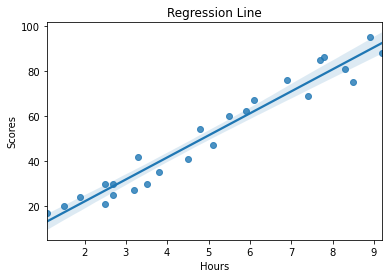

In [16]:
import seaborn as sns
sns.regplot(x="Hours",y="Scores",data=sml).set_title("Regression Line")
plt.show()

# Making Predictions

In [17]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [18]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
# You can also test with your own data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


Here the model predicts that if student study 9.25 hours in a day then student can score around 93.69%.

In [21]:
print("Training set score:{:.3f}".format(regressor.score(X_train,y_train)))
print("Testing set score:{:.3f}".format(regressor.score(X_test,y_test)))

Training set score:0.952
Testing set score:0.945


Difference between training score and testing score are very less or close which means that we avoided overfitting.This Means we have not over-fit the model.

In [22]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975


In [23]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error: 21.5987693072174


In [24]:
print('Root Of Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Of Mean Squared Error: 4.6474476121003665


# Interpretation

### Here the difference between MAE and RMSE are very less ,means that error size are less.our data and model are more representative with respect to mean